## Veränderungen der Müttersterblichkeitsrate zwischen 1990 und 2020

Gruppe: Veronika Miteva, Cristiana Pereira Bastos

Fragen

- Welche Länder verzeichneten zwischen 1990 und 2020 die grösste Zunahme bzw. Abnahme der Müttersterblichkeitsrate?
- Welche Ursachen haben diese Veränderungen bewirkt?

Quellen

- https://ourworldindata.org/grapher/maternal-mortality?tab=chart



## 1. Daten beschaffen und laden

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# loading the data
df = pd.read_csv('maternal-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Müttersterblichkeitsrate']) 
df.head()  

,Gebiet,Code,Jahr,Müttersterblichkeitsrate
0,Afghanistan,AFG,1990,1377.8586
1,Afghanistan,AFG,1991,1392.7859
2,Afghanistan,AFG,1992,1451.5940
3,Afghanistan,AFG,1993,1368.8162
4,Afghanistan,AFG,1994,1375.0907


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [13]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Müttersterblichkeitsrate')
df_pivot.head(10)

Jahr,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1377.858600,1392.785900,1451.594000,1368.816200,1375.090700,1400.843100,1375.512100,1365.285400,1459.281700,1359.217000,...,883.713900,833.477200,820.685360,785.354060,775.692700,749.815700,681.807560,663.427500,644.272600,620.407530
Africa,850.230470,841.734440,866.155600,856.238300,823.597660,801.836240,797.670800,782.369260,804.273740,739.202330,...,559.112730,544.019350,535.414900,527.162960,511.222660,504.341700,496.157680,487.919560,478.501220,464.001100
Albania,32.874947,29.074210,27.674513,26.515451,24.240550,22.034124,18.685230,18.388054,15.522337,14.890729,...,8.045227,7.796703,7.215363,7.009861,6.878285,6.656085,6.689698,5.429293,5.305023,8.276446
Algeria,205.819780,203.991150,203.641430,203.941440,202.641190,203.828450,192.425870,180.901370,186.704060,186.782930,...,105.463295,99.075800,94.344080,86.151470,89.132650,88.997700,89.143540,79.491210,76.714340,77.694786
Angola,1101.505700,1057.425800,1144.283900,1096.306500,1062.217900,1022.624200,997.420500,961.121640,934.120200,893.486900,...,334.731300,304.040400,291.413970,291.747340,273.596530,269.823580,252.804860,233.096250,227.686970,221.906510
Argentina,87.814260,82.481020,81.170950,78.660240,77.387950,76.439950,69.662770,70.722530,69.755104,70.112686,...,50.251950,45.024837,43.346664,41.764570,39.335068,40.259438,38.243805,33.944830,32.602604,44.900078
Australia,8.255920,8.785240,8.792665,8.958936,9.348918,8.086464,7.786785,7.883337,7.467751,7.176690,...,5.937448,5.859328,5.993525,5.390199,5.244025,5.175834,4.771443,4.424252,5.085507,2.941509
Azerbaijan,47.490790,49.915430,51.201244,57.301630,59.103413,58.415882,65.263670,61.925827,63.672516,55.722027,...,30.739494,29.373413,28.398930,28.972912,29.377861,26.018137,26.893013,27.599777,26.869574,40.763668
Bahamas,53.264645,54.550106,56.040950,57.743706,53.773705,56.056854,59.031590,59.091793,54.490010,66.813896,...,100.577354,101.345790,82.225075,96.984470,84.445320,79.304985,77.332810,77.080315,82.026985,77.050640


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

Die Analyse der einzelnen Spalten ergibt folgende Erkenntnisse:  
- Die Spalte *Gebiete* umfasst 110 unterschiedliche Regionen.  

In [14]:
df.dtypes

Gebiet                       object
Code                         object
Jahr                          int64
Müttersterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [18]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  110


In [19]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan     31
Portugal        31
Slovenia        31
Slovakia        31
Sierra Leone    31
                ..
Estonia         31
Eritrea         31
Zimbabwe        31
Dominica        10
Mayotte          5
Name: count, Length: 110, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

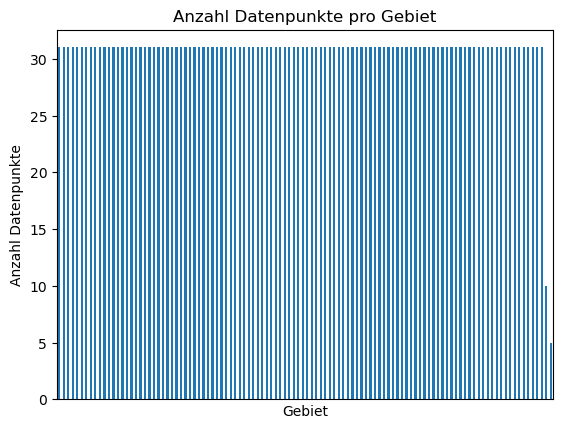

In [20]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')